In [1]:
import pandas as pd
# open all_deployments_with_organizations.csv
df = pd.read_csv('all_deployments_with_organizations.csv')
df.head()

,organization_id,platform_id,platform,name,votes_count,proposals_count,website,additional,organization_type
0,000102cf-f7ff-5344-a072-5c1eb9cd9e7b,brotherfour.eth,snapshot,ball,1,2,https://snapshot.org/#/brotherfour.eth,NaN,single
1,0004426f-4846-5e0c-b430-31e48f9a840a,7wsrKBeTpqfcribDo34qr8rdSbqXbmQq9Fog2cVirK6C,realms,SoltatoDAO,0,2,NaN,NaN,single
2,0007ea62-9696-5eaf-be0c-53f400efaea7,factprotocol.eth,snapshot,Fact Protocol,2,1,https://snapshot.org/#/factprotocol.eth,"factprotocol, https://fact.technology",single
3,0013404c-63e9-5d31-8a21-895b95b8f43a,own-protocol.eth,snapshot,O,0,0,https://snapshot.org/#/own-protocol.eth,NaN,single
4,00179063-8b35-52e3-8b7c-9e3e5c5a4947,0x8fad9fabccc77652267493cd862b871effdfe222,aragon,NaN,0,5,https://etherscan.io/address/0x8fad9fabccc7765...,NaN,single


In [19]:
# organizations_df from a group by on organization_id, sum the votes_count and the proposals_count, keep count of the number of deployments
organizations_df = df.groupby('organization_id').agg({'votes_count': 'sum', 'proposals_count': 'sum', 'platform': 'count'}).reset_index()
# rename name to deployments_count
organizations_df = organizations_df.rename(columns={'platform': 'deployments_count'})
organizations_df.head()

,organization_id,votes_count,proposals_count,deployments_count
0,000102cf-f7ff-5344-a072-5c1eb9cd9e7b,1,2,1
1,0004426f-4846-5e0c-b430-31e48f9a840a,0,2,1
2,0007ea62-9696-5eaf-be0c-53f400efaea7,2,1,1
3,0013404c-63e9-5d31-8a21-895b95b8f43a,0,0,1
4,00179063-8b35-52e3-8b7c-9e3e5c5a4947,0,5,1


In [20]:
# deployments count val counts
organizations_df['deployments_count'].value_counts()

1     22997
2       273
3        31
4         5
5         2
6         2
7         1
12        1
24        1
Name: deployments_count, dtype: int64

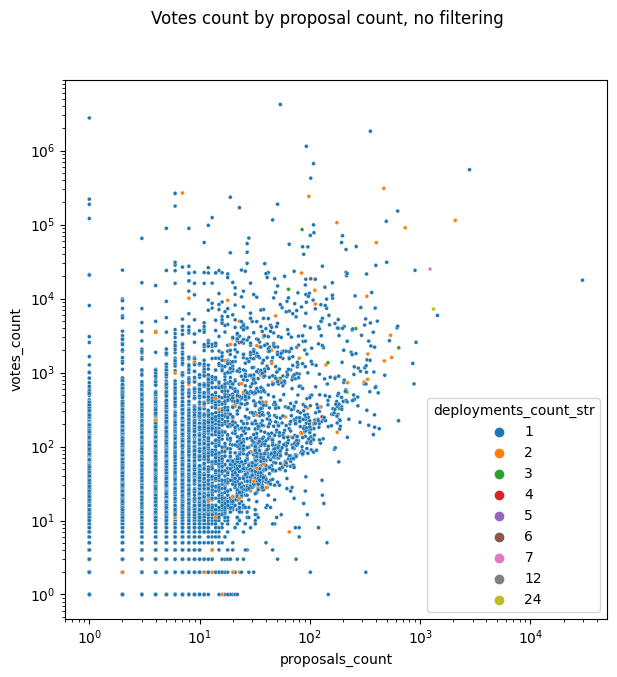

In [28]:
# scatter plot of organizations_df
# organizations_df.plot.scatter(x='votes_count', y='proposals_count', c='deployments_count', colormap='viridis')
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(7, 7))
# small dots
# make a col for deployments_count_str
organizations_df['deployments_count_str'] = organizations_df['deployments_count'].astype(str)
sns.scatterplot(x='proposals_count', y='votes_count', hue='deployments_count_str', data=organizations_df, s=8, ax=ax)
ax.set(xscale="log", yscale="log")
plt.suptitle('Votes count by proposal count, no filtering')
# remove the str column
organizations_df = organizations_df.drop(columns=['deployments_count_str'])
plt.show()

In [29]:
organizations_df.shape

(23313, 4)

In [31]:
filtered_organizations_df = organizations_df[(organizations_df['proposals_count'] > 10) & (organizations_df['votes_count'] > 50)]
filtered_organizations_df.shape

(1614, 4)

In [32]:
# filter the df to only include the rows where the organization_id is in the filtered_organizations_df
filtered_df = df[df['organization_id'].isin(filtered_organizations_df['organization_id'])]
filtered_df.shape

(1744, 9)

In [33]:
# save filtered_deployments_with_organizations.csv
filtered_df.to_csv('filtered_deployments_with_organizations.csv', index=False)